### Pair II
# Test Estadísticos

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

# Para visualizar todas las columnas
# ==================================
pd.options.display.max_columns = None

# Para la gestión de los warning
# ======================
import warnings
warnings.filterwarnings('ignore')

# Testear estadísticos
from scipy import stats 
from scipy.stats import skew   #asimetría
from scipy.stats import kurtosistest    #curtosis

1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

En el error de tipo I rechazamos H0 cuando es verdeadera, mientras que en el error de tipo II no rechazamos H0, siendo verdadera, es decir, aceptamos la hipótesis nula cuando es verdadera.

2. ¿Qué es la asimetría?

la asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media. Una distribución asimétrica puede tener una curva sesgada hacía la derecha o la izquierda. 

La asimetría se puede determinar según la forma en que la media, la mediana y la moda de una distribución se relacionan entre sí. Podemos tener: 

- **Distribuciones asimetricas positivas**: Cuando la media es mayor que la mediana y la moda.



- **Distribuciones asimetricas negativas**: Cuando la media es menor que la mediana y la moda.	



- **Distribuciones simetricas**: Cuando la media es igual a la mediana y la moda.

3. ¿Es vuestra variable respuesta asimétrica?

In [2]:
df = pd.read_pickle("../data/cost_of_living_pair1_limpio.pkl")
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01


In [3]:
df["salario"].median()

1425.471

In [4]:
df["salario"].mean()

1728.3360168397417

In [5]:
df["salario"].mode()

0    1817.033501
Name: salario, dtype: float64

In [6]:
df["salario"].skew()

1.4198169892026422

Nuestra variable respuesta es asimétrica  positiva porque el valor es positivo, los datos que tenemos son asimétricos positivos y, por lo tanto, no son normales. Además comprobando los valores de la media, la moda y la mediana, observamos que la media es ligeramente mayor que la mediana y la moda. Por lo que la distribución es asimétrica positiva.

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [7]:
df['salario'].isnull().sum()

0

In [8]:
df['salario']

0        586.350000
1       1382.830000
2        483.190000
3        419.020000
4       2672.230000
           ...     
4869    1817.033501
4870    1817.033501
4871    1540.604000
4872    2345.616000
4873    1817.033501
Name: salario, Length: 4874, dtype: float64

In [9]:
kurtosistest(df['salario'])

KurtosistestResult(statistic=17.8064402785023, pvalue=6.299075982994147e-71)

Entendiendo que la curtosis es una medida del grado de cuántos valores atípicos hay, para una distribución normal, el valor del estadístico de curtosis es 0. En el caso de nuestra variable respuesta, encontramos una curtosis de tipo leptocurtosis, puesto que el p- < de 0.05. Así que hay evidencias para rechazar H0
En una distribución leptocúrtica, los valores de los datos están más concentrados alrededor de la media y hay menos valores atípicos.

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

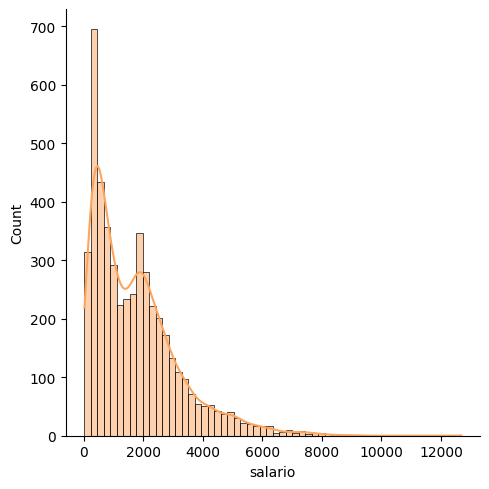

In [11]:
sns.displot(df['salario'], kde = True, color = qualitative_colors[1])
plt.savefig("../graficas/02_test_normalidad_vr_.png");

Nuestra variable respuesta no es normal, ya que presenta una distribución de los valores concentrados en la parte izquierda. Por lo que nuestra variable está sesgada a la derecha.

In [11]:
df.to_pickle("../data/cost_of_living_pair2.pkl")